# Data Preprocessing

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
df=pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
df.duplicated().sum()

np.int64(0)

In [193]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [194]:
df.drop(['Cabin','PassengerId'],axis=1,inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-309990691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-309990691.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [195]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


# EDA

<Axes: xlabel='Survived', ylabel='count'>

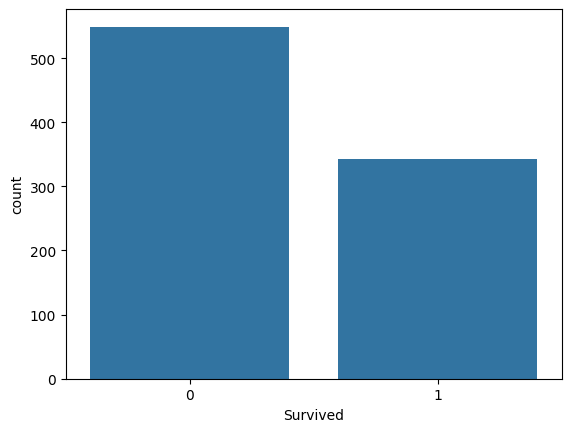

In [196]:
sns.countplot(data=df,x='Survived')

Text(0.5, 1.0, 'Survival Count by Sex')

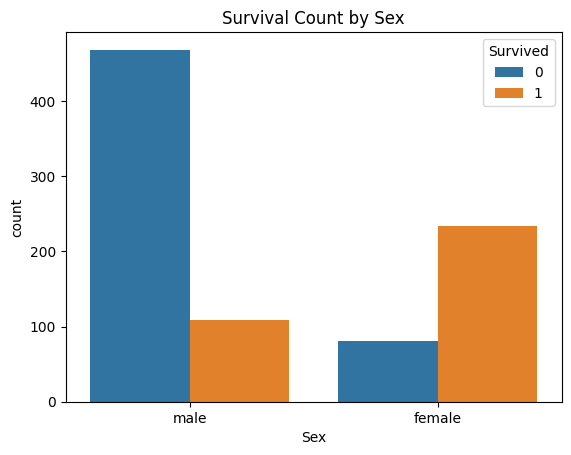

In [197]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')


Text(0.5, 1.0, 'Survival Count by Passenger Class')

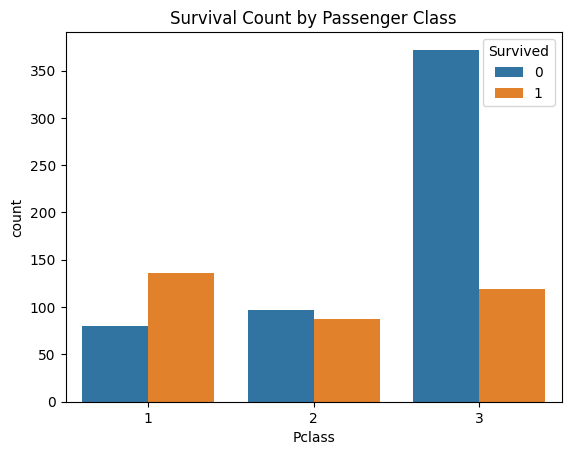

In [198]:

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')

<Axes: xlabel='Embarked', ylabel='count'>

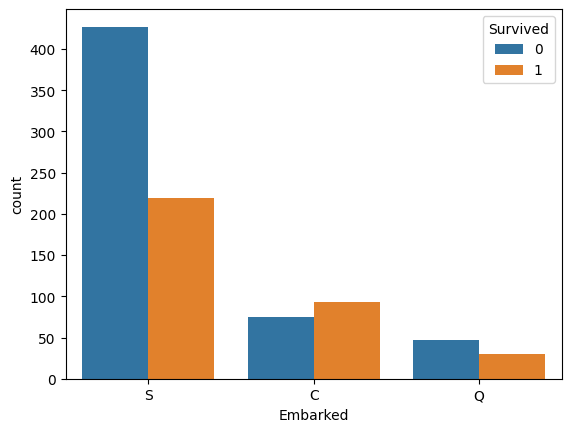

In [199]:
sns.countplot(data=df,x='Embarked',hue='Survived')

Text(0.5, 1.0, 'survived count based on Age')

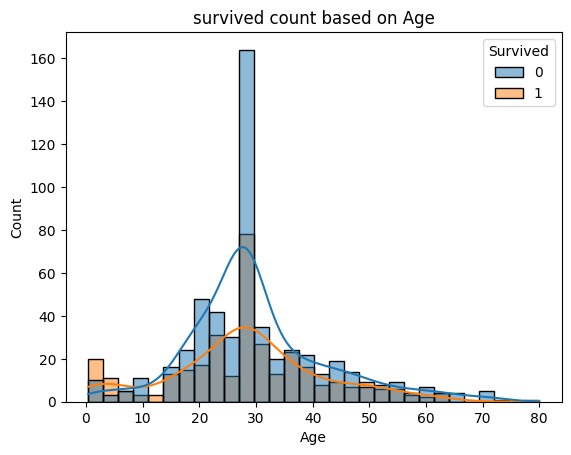

In [200]:
sns.histplot(data=df,x='Age',hue='Survived',kde=True)
plt.title('survived count based on Age')

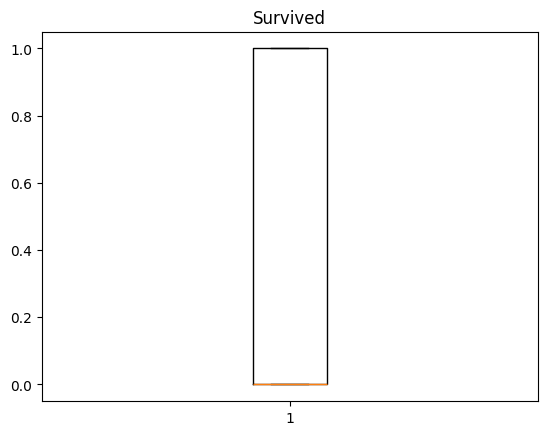

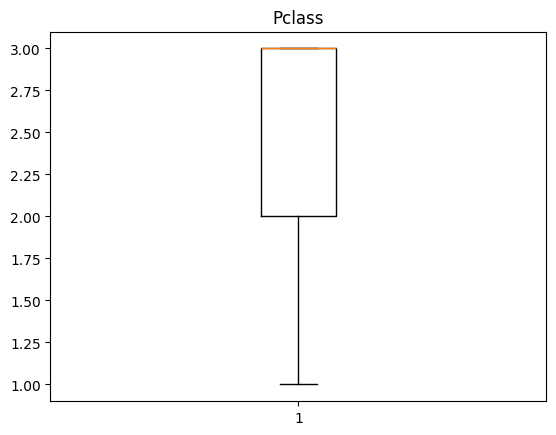

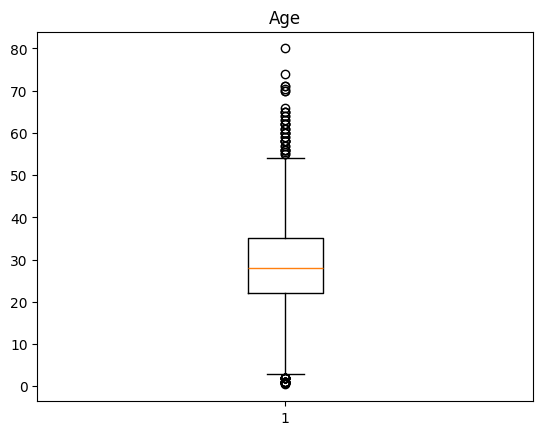

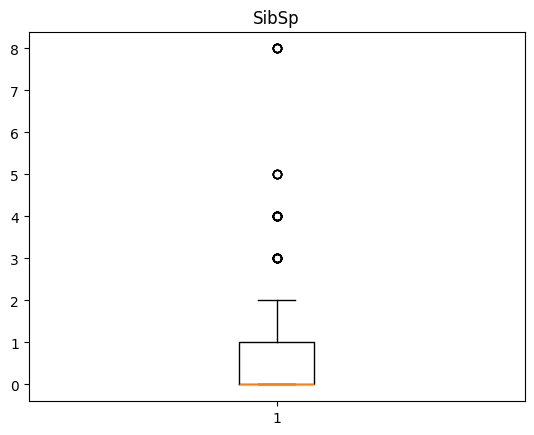

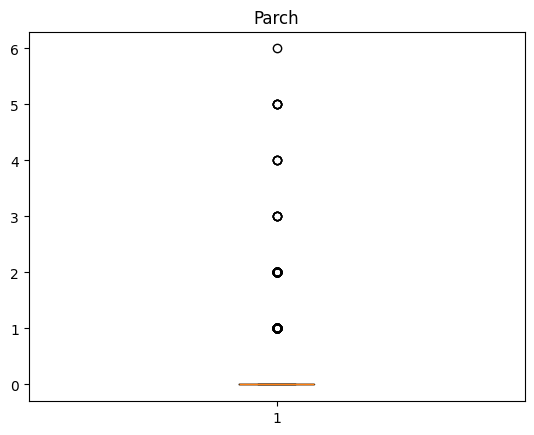

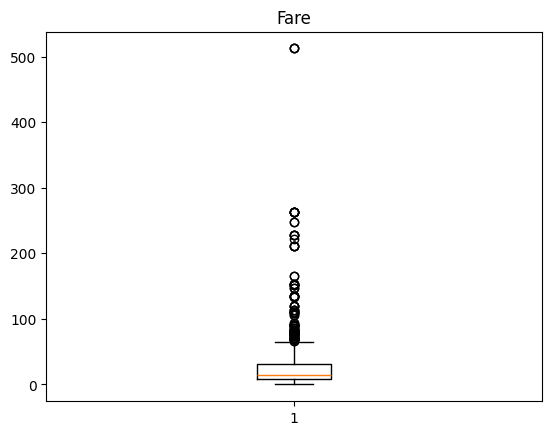

In [201]:
for i in df.select_dtypes(include=['int64', 'float64']).columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [202]:
#outliers
#Age is meaningful, and elders are valid passengers. so we will keep it
df['Fare'] = df['Fare'].apply(lambda x: np.log(x + 1))
df['SibSp'] = df['SibSp'].apply(lambda x: min(x, 3))
df['Parch'] = df['Parch'].apply(lambda x: min(x, 3))

In [203]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [204]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,1,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,1,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,1,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,0,1,Mr


In [205]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# model training

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)

In [207]:


X = df.drop(['Survived', 'Name', 'Ticket','SibSp','Parch'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [208]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Compute confusion matrix once
    cm = confusion_matrix(y_test, y_pred)

    # Print model evaluation
    print(f"\n--- Evaluation for {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



--- Evaluation for Logistic Regression (Grid) ---
Accuracy: 0.8208955223880597
Precision: 0.7758620689655172
Recall: 0.8035714285714286
F1 Score: 0.7894736842105263
ROC AUC Score: 0.8184523809523809
Confusion Matrix:
 [[65 13]
 [11 45]]


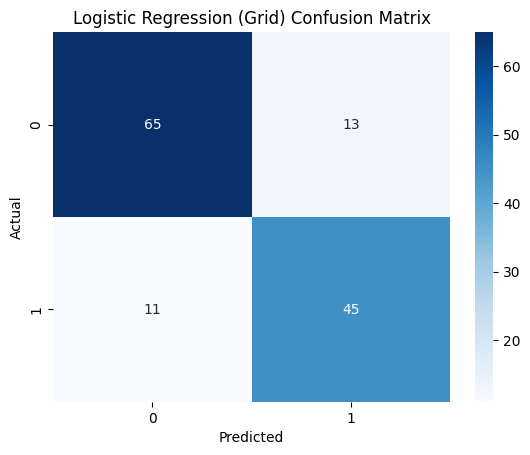

In [209]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_params = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(lr_pipe, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
evaluate_model(lr_grid, X_test, y_test, "Logistic Regression (Grid)")



--- Evaluation for Random Forest (Grid) ---
Accuracy: 0.835820895522388
Precision: 0.8269230769230769
Recall: 0.7678571428571429
F1 Score: 0.7962962962962963
ROC AUC Score: 0.8262362637362636
Confusion Matrix:
 [[69  9]
 [13 43]]


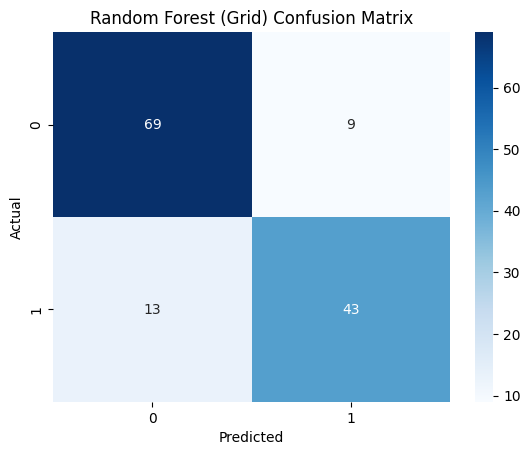

In [210]:
rf_pipe = Pipeline([
    ('clf', RandomForestClassifier())
])

rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
evaluate_model(rf_grid, X_test, y_test, "Random Forest (Grid)")


--- Evaluation for KNN (Grid) ---
Accuracy: 0.835820895522388
Precision: 0.8269230769230769
Recall: 0.7678571428571429
F1 Score: 0.7962962962962963
ROC AUC Score: 0.8262362637362636
Confusion Matrix:
 [[69  9]
 [13 43]]


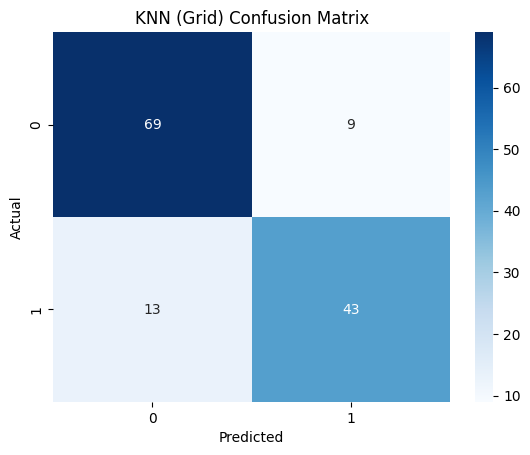

In [211]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

knn_params = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
evaluate_model(knn_grid, X_test, y_test, "KNN (Grid)")

# Test

In [212]:
test_df = pd.read_csv('/content/test.csv')

In [213]:
# === Test set preprocessing to match training ===

# Drop Cabin and keep PassengerId for submission later
passenger_ids = test_df['PassengerId']
test_df.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

# Fill missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)  # Important: test set has missing Fare
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Outlier handling (same as training)
test_df['Fare'] = test_df['Fare'].apply(lambda x: np.log(x + 1))
test_df['SibSp'] = test_df['SibSp'].apply(lambda x: min(x, 3))
test_df['Parch'] = test_df['Parch'].apply(lambda x: min(x, 3))

# Feature engineering
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone'] = (test_df['FamilySize'] == 0).astype(int)
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# One-hot encoding
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Drop same features as in training
X_final_test = test_df.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

# Align with training columns to avoid mismatches
X_final_test, _ = X_final_test.align(X, join='right', axis=1, fill_value=0)



/tmp/ipython-input-2637360574.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
/tmp/ipython-input-2637360574.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [214]:
# Align test data columns with training data columns
X_final_test, _ = X_final_test.align(X, join='right', axis=1, fill_value=0)


In [215]:
predictions = rf_grid.predict(X_final_test)

In [216]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)
